# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [11]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [12]:
# your code here
date = pd.date_range(start='8/1/2018', end='10/31/2018')
print(date)
len(date)

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
      

92

Generate the values for the wite noise process representing Nina's commute in August and September.

In [13]:
# your code here
commute = np.random.normal(loc=25, scale=4, size=92)
commute

array([26.89194333, 22.27429648, 25.96975799, 18.19705746, 28.01257134,
       18.86111464, 25.02050831, 24.51908932, 21.77207249, 36.48727758,
       22.60870832, 26.88982797, 29.38382447, 20.1393248 , 30.36942549,
       24.51140085, 29.05006191, 21.34452341, 20.88187917, 29.8391858 ,
       27.00748922, 25.55538471, 27.56304445, 27.10933066, 20.38255906,
       16.14666608, 18.27297396, 17.847623  , 16.12586022, 22.41027688,
       22.88638272, 24.8431633 , 25.85990379, 23.46256479, 23.98438369,
       25.2930083 , 21.01118465, 22.14457485, 25.14166538, 22.28821854,
       22.71247575, 24.57655074, 30.34332535, 26.27466115, 23.649619  ,
       22.65892689, 24.54032024, 33.96727118, 12.41033391, 27.14054357,
       25.92996176, 28.4704478 , 20.40714914, 33.45737697, 29.00377104,
       24.79434002, 25.63915079, 22.13494565, 25.20209131, 24.42665034,
       28.77430156, 26.4305769 , 24.66620319, 27.71122441, 27.2242415 ,
       25.89087784, 18.88405808, 29.1168447 , 20.33496496, 20.96

Create a time series with the dates and the commute times.

In [14]:
# your code here
commute = pd.Series(commute, index=date)
commute.head()

2018-08-01    26.891943
2018-08-02    22.274296
2018-08-03    25.969758
2018-08-04    18.197057
2018-08-05    28.012571
Freq: D, dtype: float64

Visualize the time series and set appropriate axis labels.

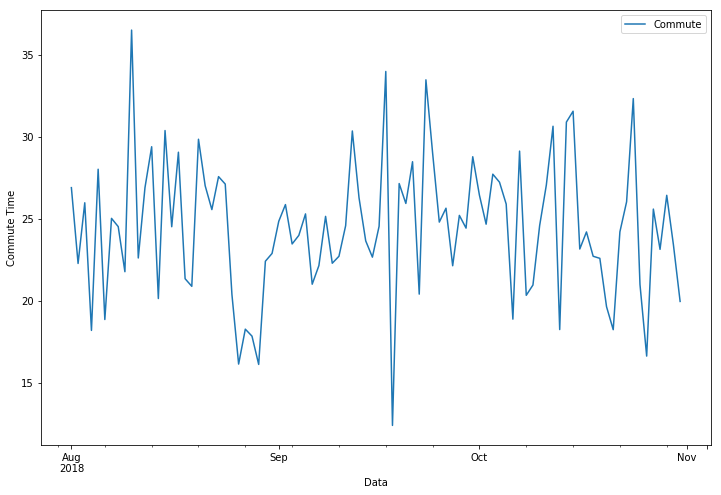

In [15]:
# your code here
fig = plt.figure(figsize = (12,8))
commute.plot(label='Commute')
plt.xlabel('Data')
plt.ylabel('Commute Time')
plt.legend()
plt.show()

Print Nina's shortest and longest commute.

In [16]:
# your code here
min(commute)

12.41033391382408

In [17]:
# your code here
max(commute)

36.487277579955666

Look at the distribution of commute times.

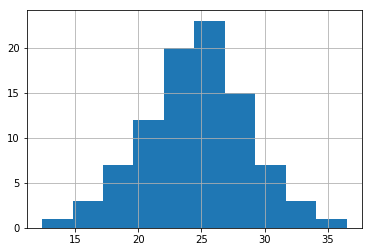

In [18]:
# your code here
commute.hist()

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [19]:
# your code here
commute.mean()

24.437618956728112

In [20]:
# your code here
commute.std()

4.283443280014909

Now, let's look at the mean and standard error for August and October respectively. 

In [21]:
# your code here
aug = commute['2018-08']
oct = commute['2018-10']
print(aug.mean(), aug.std())
print(oct.mean(), oct.std())

24.01069167967552 4.7258063721016
24.302794208974436 4.148224232744428


Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong depencence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of november of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [30]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
date = pd.date_range(start='1/1/2010', end='11/30/2010')

error = np.random.normal(loc=0, scale=10, size=len(date))

def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error)
    Y = cum_error + Y_0 
    return Y



values = random_walk(1000, error)
print(values)
print(len(values))

values_series = pd.Series(values, index=date)

[1017.49454741 1014.63381744 1009.78816612  983.25498053  983.17213424
  979.9758206   974.60952698  977.76355366  981.97406082  971.31803102
  962.45563432  957.69829939  964.59512249  970.20704425  957.15155916
  945.95680654  953.32518045  969.07152118  968.7607703   961.92630402
  972.88260101  969.78683464  977.04435689  992.53507322  998.83587144
  999.57080381 1006.89351735 1000.46776343  998.68683168  992.94728608
  990.90353293  986.03858192  984.18082868  980.37546452  981.26524087
  981.90195748  984.86542857  998.89313976  983.42451408  996.38069993
  994.00819547  981.68473341  979.96053574  980.87891949  991.55450406
  980.93815957  983.11164165  984.2898367   967.44872777  955.59117511
  961.59219517  968.54786772  979.42497633  984.76319348  988.71531361
  989.9439889  1002.03500533  993.60434431  992.1854085   996.03894989
  980.2640068   993.3734432   985.44479312  984.727299   1006.29404326
  997.99967074  992.70595046 1008.3229874   997.52104915  993.20047296
  998.

Visualize the time series with correct axis labels

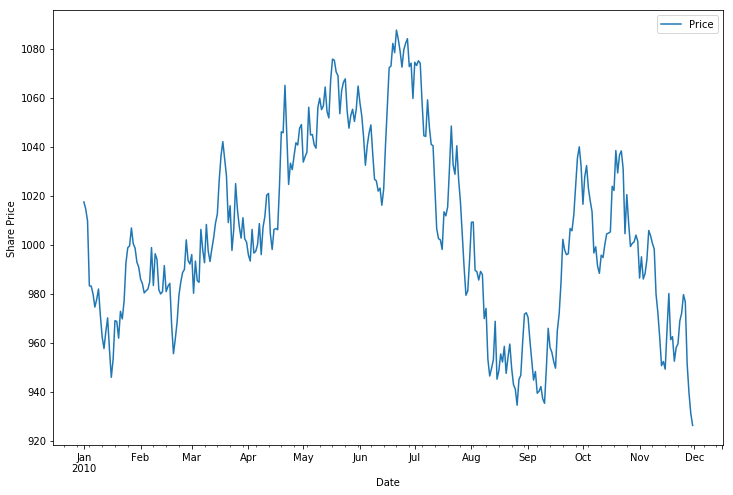

In [31]:
# your code here
plt.figure(figsize = (12,8))
values_series.plot(label='Price')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.legend()
plt.show()


You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [42]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
date = pd.date_range(start='1/1/2010', end='11/30/2010')

error = np.random.normal(loc=0, scale=10, size=len(date))

def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error+8)
    Y = cum_error + Y_0 
    return Y

values_drift = random_walk(1000, error)



values_drift_series = pd.Series(values_drift, index=date)

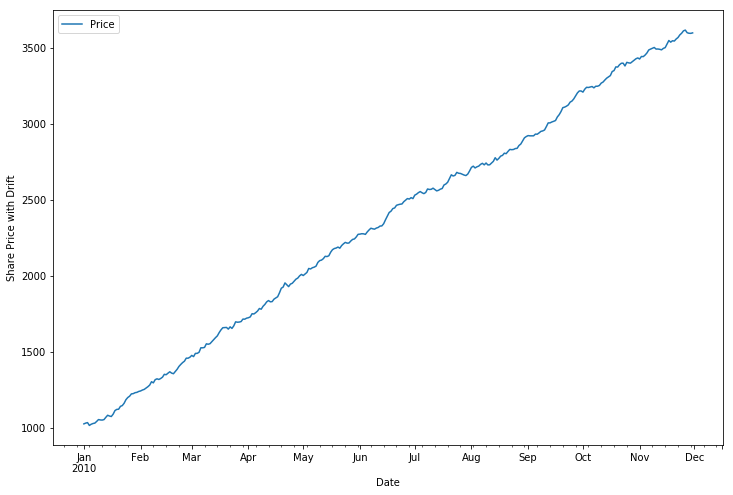

In [43]:
# your code here
plt.figure(figsize = (12,8))
values_drift_series.plot(label='Price')
plt.xlabel('Date')
plt.ylabel('Share Price with Drift')
plt.legend()
plt.show()


Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

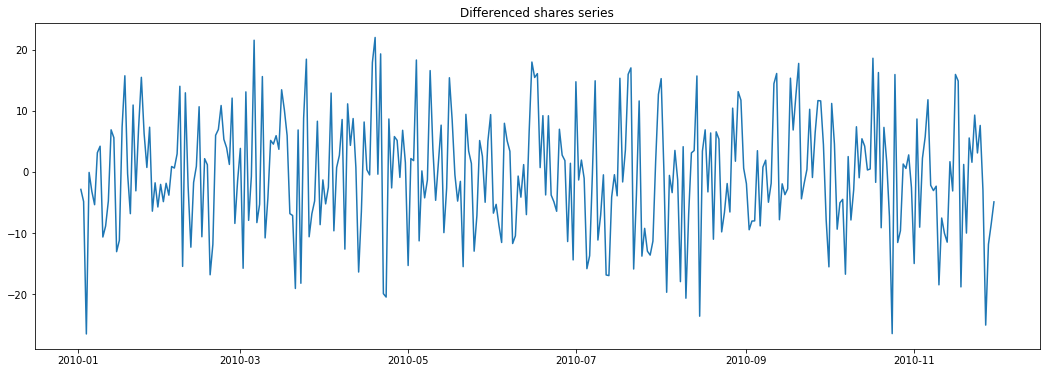

In [44]:
# your code here
shares_diff = values_series.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(shares_diff)
plt.title('Differenced shares series')
plt.show()

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

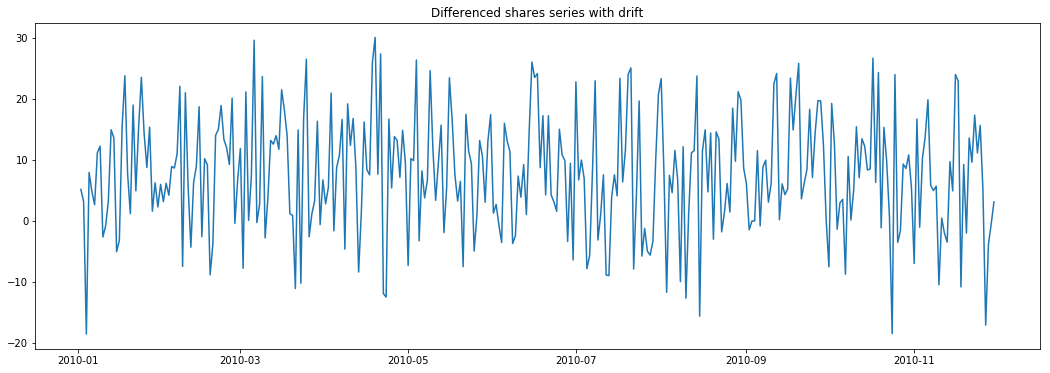

In [45]:
# your code here
drift_diff = values_drift_series.diff(periods=1)
fig = plt.figure(figsize=(18,6))
plt.plot(drift_diff)
plt.title('Differenced shares series with drift')
plt.show()

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!